## 3-1 Accuracy(정확도)

In [52]:
import numpy as np
from sklearn.base import BaseEstimator

# BaseEstimator 상속받음
class MyDummyClassifier(BaseEstimator) :
    # fit() 메소드는 아무것도 학습하지 않음
    def fit(self, x, y = None) :
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, x):
        pred = np.zeros( (x.shape[0],1))
        for i in range(x.shape[0]) : 
            if x['Sex'].iloc[i] == 1 :
                pred[i] = 0
            else : 
                pred[i] = 1
                
        return pred

In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace= True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 DataPrePocessing 함수 호출
def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('../titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis=1)
x_titanic_df = transform_features(x_titanic_df)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)

mypredictions = myclf.predict(x_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Classifier의 정확도는 : 0.7877


In [55]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator) :
    def fit(self, x, y) :
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, x) :
        return np.zeros( (len(x),1), dtype=bool )
    
# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data_shape : ",digits.data.shape)
print(digits.target)
print("### digits.target.shape : ",digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data_shape :  (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape :  (1797,)


In [56]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [57]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [58]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 : ',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(x_train,y_train)
fakepred = fakeclf.predict(x_test)
print("모든 예측을 0으로 하여도 정확도는:{:.3f}".format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기 :  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


## Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

#앞절의 예측 결과인 fackpred와 실제 결과인 y_test의 Confusion Matrix 출력
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## 정밀도(Precision) 과 재현율(Recall)
<br><h4>MyFakeClassifier의 예측 결과로 정밀도와 재현율 측정

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 둘다 TP 즉 예측 Positive 실제 Positive인 건수가 0
print('정밀도 : ',precision_score(y_test,fakepred))
print('재현율 : ',recall_score(y_test,fakepred))

정밀도 :  0.0
재현율 :  0.0


C:\Users\sapb2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h4> 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:4f}'.format(accuracy,precision,recall))

In [62]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv("../titanic_train.csv")
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis=1)
x_titanic_df = transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test,pred)

# 정확도 (TN+TP) / (TN + FN + FP + FN) = (104 + 48) / (104 + 13 +14 + 48)
# 정밀도 : TP / (TP + FP) = 48 / (48 + 14)
# 재현율 : TP / (TP + FN) = 48 / (48 + 13)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.786885


C:\Users\sapb2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Precision/Recall Trade-off
<br><h4>predict_proba( ) 메소드 확인

In [63]:
# 이진분류
# predict는 0 인 확률, 1 인 확률 중 더 큰 확률의 분류값(0 인지 1인지)을 반환
# predict_proba 는 분류결정임계값 보다 큰 값 ( 0인지 1인지) 을 추출

pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 : \n : ',pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
# pred.reshape(-1,1) 2차원으로 변경
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 : 
 :  [[0.46224761 0.53775239]
 [0.87875077 0.12124923]
 [0.87720192 0.12279808]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46224761 0.53775239 1.        ]
 [0.87875077 0.12124923 0.        ]
 [0.87720192 0.12279808 0.        ]]


<h4> Binarizer 활용

In [64]:
from sklearn.preprocessing import Binarizer

x = [
    [1,-1,2],
    [2,0,0],
    [0,1.1,1.2]
    ]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


<h4>분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 변환

In [65]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 
# 2차원으로 바꿔주고
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

# Binarizer를 적용
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)
# predict 한 것과 동일.

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.786885


<h4> 분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 변환

In [66]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold)
custom_predict = binarizer.fit_transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.836066


<h4> 여러개의 분류 결정 임곗값을 변경하면서 Binarizer를 이용하여 예측값 변환

In [74]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold=custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba_c1)
        print('임곗값 : ',custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값 :  0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 : 0.7183, 재현율 : 0.836066
임곗값 :  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 : 0.7656, 재현율 : 0.803279
임곗값 :  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.786885
임곗값 :  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 : 0.8364, 재현율 : 0.754098
임곗값 :  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 : 0.8824, 재현율 : 0.737705


<h4> precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출

In [85]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:',thresholds.shape)
print("thresholds 5 sample:", thresholds[:5])

print('\n반환된 precisions 배열의 Shape:',precisions.shape)
print("precisions 5 sample:", precisions[:5])

print('\n반환된 recalls 배열의 Shape:', recalls.shape)
print("recalls 5 sample:", recalls[:5])

# 반환된 임계값 배열 row가 143건
# 임곗값을 15 Step으로 추출 -- > 샘플로 10건만 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('\n샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
thresholds 5 sample: [0.10385733 0.10385956 0.10388458 0.10791075 0.10882693]

반환된 precisions 배열의 Shape: (144,)
precisions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]

반환된 recalls 배열의 Shape: (144,)
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]
143

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


<h4> 임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림

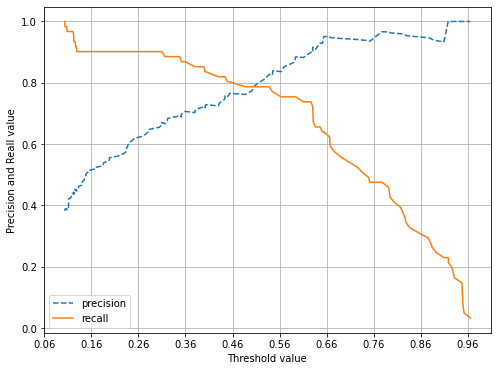

In [96]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1) :
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    
    #precisons , recalls 은 thresholds 보다 1개씩 많았음
    # 따라서 thresholds.shape[0] 으로 개수파악하여 precisons 와 recalls 도 컬럼개수맞춰 잘라줌
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    # xlim 축의 한계 설정
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Reall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

## 3.4 F1 Score

In [97]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('f1 스코어 : {0:.4f}'.format(f1))

f1 스코어 : 0.7805


In [99]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    # f1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    #f1 score print 추가
    print("정확도 : {0:.4f}, 정밀도 :{1:.4f}, 재현율 : {2:.4f}, F1:{3:.4f}".format(accuracy,precision,recall,f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값 :  0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 :0.7183, 재현율 : 0.8361, F1:0.7727
임곗값 :  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 :0.7656, 재현율 : 0.8033, F1:0.7840
임곗값 :  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 :0.7742, 재현율 : 0.7869, F1:0.7805
임곗값 :  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 :0.8364, 재현율 : 0.7541, F1:0.7931
임곗값 :  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 :0.8824, 재현율 : 0.7377, F1:0.8036


## 3-5 ROC Curve와 AUC

In [105]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
print(thresholds.shape[0])
# 반환된 임곗값 배열 로우가 55건이므로 샘플로 11건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

55
샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [1.97 0.75 0.63 0.59 0.49 0.4  0.35 0.23 0.13 0.12 0.11]
샘플 임곗값별 FPR:  [0.    0.017 0.034 0.051 0.127 0.161 0.203 0.331 0.585 0.636 0.797]
샘플 임곗값별 TPR:  [0.    0.475 0.689 0.754 0.787 0.836 0.869 0.902 0.918 0.967 0.967]


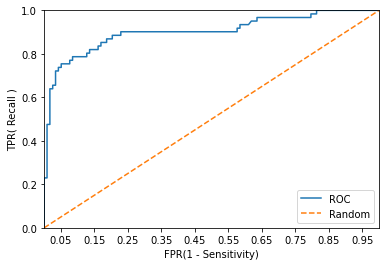

In [120]:
def roc_curve_plot(y_test, pred_proba_c1) :
     # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
        
    # ROC Curve를 plot 곡선으로 그림
    plt.plot(fprs,tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0,1],[0,1],'--',label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

In [121]:
from sklearn.metrics import roc_auc_score

# roc_auc_scroe(y_test, y_score)
# y_score는 predict_proba()로 호출된 예측확률 중 positive 열에 해당하는 ndarray

pred_proba = lr_clf.predict_proba(x_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.9025


In [131]:
def get_clf_eval(y_test, pred=None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test, pred)
    f1= f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print 추가
    print("정확도 : {0:.4f}, 정밀도 :{1:.4f}, 재현율 : {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}".format(accuracy,precision,recall,f1,roc_auc))

In [132]:
thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(x_test)[:,1]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold=custom_threshold)
        custom_predict = binarizer.fit_transform(pred_proba_c1)
        print('\n임곗값 : ',custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

get_eval_by_threshold(y_test, pred_proba.reshape(-1,1), thresholds)


임곗값 :  0.4
오차행렬
[[98 20]
 [10 51]]
정확도 : 0.8324, 정밀도 :0.7183, 재현율 : 0.8361, F1:0.7727, AUC:0.9025

임곗값 :  0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 : 0.8492, 정밀도 :0.7656, 재현율 : 0.8033, F1:0.7840, AUC:0.9025

임곗값 :  0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 :0.7742, 재현율 : 0.7869, F1:0.7805, AUC:0.9025

임곗값 :  0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 : 0.8659, 정밀도 :0.8364, 재현율 : 0.7541, F1:0.7931, AUC:0.9025

임곗값 :  0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 : 0.8771, 정밀도 :0.8824, 재현율 : 0.7377, F1:0.8036, AUC:0.9025
